* Nombre: Juan Pablo Otálvaro Ghisays
* Correo: juan.otalvaro1@udea.edu.co
* ID: 1003047917

### 1.) Encontrar raíces de $f(x) = x^2-11$

Lo primero que haremos será visualizar la función.

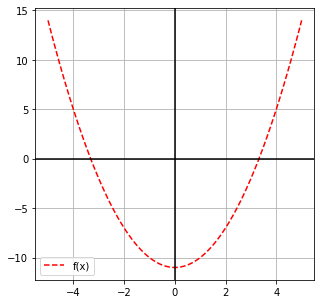

In [5]:
#-----------------------------------------
import matplotlib.pyplot as plt
import numpy as np 
#-----------------------------------------
x = np.linspace(-5,5,100) #Creamos nuestro array

fig, ax = plt.subplots(1,1,figsize=(5,5)) #Definimos la figura

ax.plot(x,x**2-11,'--r',label='f(x)') #Dibujamos la función

plt.axhline(y=0, color="black",xmin=0, xmax=10) #eje x
plt.axvline(x=0, color="black",ymin=0, ymax=10) #eje y

ax.legend() 
ax.grid(True)
#----------------------------------------------------------------

La función tiene 2 raices.

Hallaremos la primera con el método de ***bisección*** y la segunda por ***Newton-rapson***

### a.) Método de bisección

In [6]:
def bisection(x_l,x_u,tol):
    """Esta función realiza el método de root findind: bisection para la función específica f(x)=x**2-11
        Dados los valores de los brackets y la tolerancia."""
    #--------------------------------------------------------------------------
    x_r = (x_l+x_u)/2 #Estimamos el punto medio entre los brackets como la raiz
    f_r = x_r**2-11 #evaluamos nuestra estimación de la raíz en f(x)
    #--------------------------------------------------------------------------
    evolucion = [x_r] #definimos listas donde veremos la evolucion de la aproximación
    evolucionf = [f_r]
    #---------------------------------------------------------------------------
    #Evaluamos los brackets en la función
    f_l = x_l**2-11
    f_u = x_u**2-11
    #--------------------------------------------------------------------------
    #---------------------------------------------------------------------------
    while abs(f_r)>tol: #Mientras nuestra raiz no cumpla la tolerancia
        #--------------------------------------------------------------
        if f_l*f_r>0: #verificamos en cual subintervalo está la raiz
            x_l = x_r #reasignamos variables
            f_l = f_r
            x_r = (x_l+x_u)/2 #estimamos la raiz como el punto medio x_r
            f_r = x_r**2-11 #calculamos f(x_r)    
        #--------------------------------------------------------------
        else: #Si la raiz está en el otro subintervalo
            x_u = x_r #reasignamos variables
            f_u = f_r
            x_r = (x_l+x_u)/2 #estimamos la raiz como el punto medio x_r
            f_r = x_r**2-11 #calculamos f(x_r)
        #--------------------------------------------------------------- 
        evolucion.append(x_r)
        evolucionf.append(f_r)
        #---------------------------------------------------------------
    return x_r, evolucion, evolucionf #devolvemos la raiz, la lista de x y la lista de f(x)

De la imagen podemos ver que la raíz de la izquierda está entre -4 y -2. Por lo tanto, definiremos

* $x_l = -4$
* $x_u = -2$

In [7]:
x_r, aprox, aproxf = bisection(-4,-2,0.000001)
#usamos nuestra funcion para hallar la primera raiz y obtener las listas de aproximacion
print(x_r)

-3.316624641418457


La raiz hallada por el primer metodo fue $x_1 = -3.316624641418457$

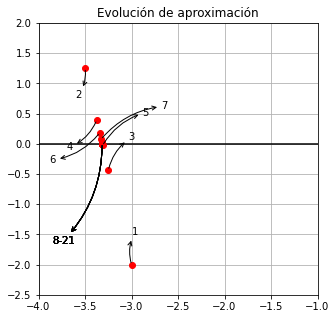

In [8]:
#-----------------------------------------------------------------
import numpy as np #Así se importa numpy
import matplotlib.pyplot as plt #Así se importan matplotlib
#-----------------------------------------------------------------
fig, ax = plt.subplots(1,1,figsize=(5,5)) #Así se define una figura

plt.axhline(y=0, color="black",xmin=0, xmax=10)
plt.axvline(x=0, color="black",ymin=0, ymax=10)

ax.plot(aprox,aproxf,'or') #Dibujamos los puntos 

for i in range(0,7): #Le ponemos marcas a los puntos para saber el orden
    plt.annotate(str(i+1),
            xy=(aprox[i],aproxf[i]), xycoords='data',
            xytext=(+10*i*(-1)**i, +30*(-1)**i), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3,rad=.2"))
    plt.annotate('8-21',
            xy=(aprox[-1],aproxf[-1]), xycoords='data',
            xytext=(-50, -100), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3,rad=.2"))
#Se pueden modificar distintos detalles
ax.set_title('Evolución de aproximación')
ax.set_ylim(-2.5,2)
ax.set_xlim(-4,-1)
ax.grid(True)

### b.) Newton-rapson

In [1]:
def n_rapson(x_0,tol):
    
    f_1 = x_0**2-11 
    evolucion = [x_0] #definimos listas donde veremos la evolucion de la aproximación
    evolucionf = [f_1]

    while abs(f_1)>tol:
        
        f_0 = x_0**2-11
        df_0 = x_0*2
        x_1 = x_0 - f_0/df_0
        f_1 = x_1**2-11
        x_0 = x_1
        evolucion.append(x_0)
        evolucionf.append(f_1)
    return x_1,evolucion,evolucionf

Hallaremos la segunda raíz por el método de ***Newton-rapson***

Elegimos un $x_0$ cualquiera, en este caso definiré $x_0=10$

In [2]:
x_1,evol,evolf = n_rapson(10,0.0001)
print(x_1)

3.316624792097127


La raiz hallada por el Segundo método fue $x_2 = 3.316624792097127$

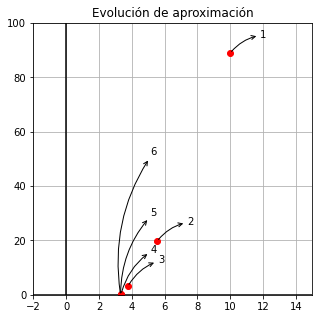

In [3]:
#-----------------------------------------------------------------
import numpy as np #Así se importa numpy
import matplotlib.pyplot as plt #Así se importan matplotlib
#-----------------------------------------------------------------
fig, ax = plt.subplots(1,1,figsize=(5,5)) #Así se define una figura

plt.axhline(y=0, color="black",xmin=0, xmax=10)
plt.axvline(x=0, color="black",ymin=0, ymax=10)

ax.plot(evol,evolf,'or') #Dibujamos los puntos 

for i in range(0,6): #Le ponemos marcas a los puntos para saber el orden
    plt.annotate(str(i+1),
            xy=(evol[i],evolf[i]), xycoords='data',
            xytext=(+30, +15+i**3), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3,rad=.2"))
ax.set_title('Evolución de aproximación')
ax.set_ylim(0,100)
ax.set_xlim(-2,15)
ax.grid(True)